

# DecisionTreeRegressor

`DecisionTreeRegressor` 是一个基于决策树算法的监督学习模型，专门用于解决**回归问题** (即预测连续值，如房价、气温、股票价格等)。

它的核心思想是通过学习一系列简单的决策规则，将特征空间 (feature space) 划分为多个不重叠的矩形区域。对于落在同一个区域内的数据点，模型会给出一个相同的预测值，这个预测值通常是该区域内所有训练样本目标值的**平均值**。

#### 工作原理

`DecisionTreeRegressor` 的构建过程是一个自上而下的递归过程：

1.  **选择最佳分割特征和分割点**:
    *   模型从根节点开始，该节点包含所有的训练数据。
    *   算法会遍历每一个特征，并对每个特征尝试所有可能的分割点。
    *   目标是找到一个特征和对应的分割点，这个分割能让划分后的两个子节点中的数据“最纯净”。

2.  **衡量“纯度”的标准 (Criterion)**:
    *   与分类树使用信息增益或基尼不纯度不同，回归树通常使用**均方误差 (Mean Squared Error, MSE)** 或**平均绝对误差 (Mean Absolute Error, MAE)** 来衡量一个节点的不纯度。
    *   最常用的是 MSE。对于一个节点 `m`，其 MSE 计算公式为：
        $$
        MSE_m = \frac{1}{N_m} \sum_{i \in \text{node } m} (y_i - \bar{y}_m)^2
        $$
        其中，$N_m$ 是节点 `m` 中的样本数量，$y_i$ 是样本 `i` 的真实值，$\bar{y}_m$ 是节点 `m` 中所有样本真实值的平均值。
    *   算法会选择那个能使分割后两个子节点的 MSE 加权和最小的分割方式。

3.  **递归构建**:
    *   在选定最佳分割点后，数据被分成两个子集，并创建两个新的子节点。
    *   这个过程在每个子节点上重复进行，直到满足某个停止条件。

4.  **停止条件**:
    *   树达到预设的最大深度 (`max_depth`)。
    *   一个节点中的样本数量少于预设的最小分割样本数 (`min_samples_split`)。
    *   一个叶子节点中的样本数量少于预设的最小叶子节点样本数 (`min_samples_leaf`)。
    *   分割后带来的“纯度”提升小于某个阈值。

5.  **预测**:
    *   当一个新的数据点需要预测时，它会从根节点开始，根据其特征值沿着树的分支向下移动，直到到达一个叶节点。
    *   该叶节点中所有训练样本目标值的**平均值**，就是这个新数据点的预测结果。

#### scikit-learn 中的关键参数

在使用 `sklearn.tree.DecisionTreeRegressor` 时，一些关键的超参数可以帮助你控制模型的复杂度和性能：

*   `criterion`: 字符串类型，可选值为 `"squared_error"` (默认) 和 `"absolute_error"`。它定义了衡量分割质量的函数。`"squared_error"` 对应均方误差 (MSE)，计算效率高；`"absolute_error"` 对应平均绝对误差 (MAE)，对异常值不那么敏感。
*   `max_depth`: 整数类型，树的最大深度。这是防止过拟合最重要的参数之一。值越小，模型越简单。
*   `min_samples_split`: 整数或浮点数，一个内部节点要进行分割所需要的最小样本数。可以有效防止模型学习到数据中过于特殊的模式。
*   `min_samples_leaf`: 整数或浮点数，一个叶子节点必须包含的最小样本数。这个参数同样用于平滑模型，防止过拟合。
*   `max_features`: 整数、浮点数或字符串，寻找最佳分割时要考虑的特征数量。限制这个值可以减少训练时间，并且也是一种防止过拟合的手段。
*   `ccp_alpha`: 非负浮点数，用于最小成本复杂度剪枝 (Minimal Cost-Complexity Pruning)。`ccp_alpha` 越大，剪掉的节点就越多，模型越简单。



### 优点 (Advantages)

1.  **易于理解和解释**: 决策树的结构非常直观，可以被可视化。非技术人员也能轻易理解模型的决策逻辑。

2.  **对数据预处理要求较低**:
    *   不需要进行特征缩放 (如标准化或归一化)，因为树的分割是基于单个特征的阈值。
    *   虽然 `scikit-learn` 的实现不能直接处理类别特征 (需要预先进行 one-hot 编码等)，但理论上决策树可以自然地处理混合类型数据。

3.  **非参数模型**: 它不对数据分布做任何假设，因此对于各种类型的数据都具有很好的适应性。

4.  **隐式特征选择**: 在构建树的过程中，对目标变量影响较大的特征会更早、更频繁地被用作分割节点，从而实现了隐式的特征选择。

5.  **预测速度快**: 一旦树被构建好，对新样本进行预测的计算成本相对较低，其时间复杂度为 O(log N)，其中 N 是树的节点数。



### 缺点 (Disadvantages)

1.  **容易过拟合 (Overfitting)**: 这是决策树最主要的缺点。如果不加限制，决策树会持续生长，直到每个叶子节点只包含一个样本，从而完美地拟合训练数据，但在新数据上的泛化能力会很差。必须通过剪枝 (Pruning) 或调整超参数 (如 `max_depth`, `min_samples_leaf`) 来缓解。

2.  **不稳定性 (Instability)**: 训练数据微小的变化（比如增删少量样本）可能会导致生成一棵完全不同的树。这种不稳定性使得单个决策树的结果难以复现和信任。这也是为什么基于决策树的集成模型 (如随机森林) 更受欢迎的原因。

3.  **预测能力有限，结果是阶梯状的**:
    *   `DecisionTreeRegressor` 的预测结果是分段常数 (piecewise constant)。它只能预测叶节点中训练样本的平均值，因此预测结果是离散的、阶梯状的。
    *   它无法进行**外插 (extrapolation)**，即无法预测超出训练数据目标值范围的值。例如，如果训练数据中的最大房价是 100 万，决策树模型永远无法预测出高于 100 万的价格。

4.  **贪心算法 (Greedy Algorithm)**: 决策树在每个节点上都采用贪心策略，选择当前最优的分割方式，但这并不能保证最终生成的树是全局最优的。



`DecisionTreeRegressor` 是一个非常基础且直观的回归模型。它的可解释性强，使其在需要理解决策过程的场景中非常有用。

然而，由于其容易过拟合和不稳定的天性，在实际应用中，单个的决策树很少被直接用于追求高预测精度的任务。它更常被用作：
*   一个**基线模型 (baseline model)**，用于快速评估一个问题的可解性。
*   **集成学习 (Ensemble Learning)** 的基石，例如在**随机森林 (Random Forest)** 和**梯度提升树 (Gradient Boosting Trees)** 中，通过组合多个决策树来克服单个树的缺点，从而获得非常强大和稳健的性能。

# 数据加载与处理

**独热编码(One-Hot Encoding)** 是处理分类数据最常见的方法之一，尤其适用于分类特征之间没有顺序关系的情况。对于 ocean_proximity 来说，不同的类别（例如 NEAR BAY、<1H OCEAN 等）之间没有内在的顺序，因此独热编码非常合适。

优点：

- 避免模型错误地将分类特征解释为有序的数值。
- 适用于大多数机器学习模型。

缺点：

- 如果类别数量很多，会显著增加特征维度（维度灾难）。


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 加载数据
df = pd.read_csv('housing.csv')

# 据预处理
# 处理缺失值（如果有）
df = df.dropna()

# 处理分类变量 - 使用 One-Hot 编码
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [2]:
# 分离特征和目标
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 创建并训练决策树模型
dt_model = DecisionTreeRegressor(
    max_depth=20,           # 最大深度
    min_samples_split=2,   # 分裂所需最小样本数
    min_samples_leaf=20,    # 叶子节点最小样本数
    random_state=42
)
dt_model.fit(X_train, y_train)


# 交叉验证
cv_scores = cross_val_score(
    dt_model, X_train, y_train, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

cv_rmse = np.sqrt(-cv_scores)
print(f"\n交叉验证 RMSE: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std():,.2f})")

# 10. 预测和评估
y_pred = dt_model.predict(X_test)

print("\n" + "=" * 50)
print("模型性能评估")
print("=" * 50)
print(f'RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}')
print(f'MAE: ${mean_absolute_error(y_test, y_pred):,.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')


交叉验证 RMSE: 58,125.34 (+/- 1,421.75)

模型性能评估
RMSE: $57,128.43
MAE: $37,729.74
R² Score: 0.7613



特征重要性排名：
               feature  importance
7        median_income    0.557468
9         ocean_INLAND    0.171286
0            longitude    0.105432
1             latitude    0.101269
2   housing_median_age    0.028648
12    ocean_NEAR OCEAN    0.010271
5           population    0.009622
6           households    0.005874
4       total_bedrooms    0.004320
3          total_rooms    0.004251
8      ocean_<1H OCEAN    0.000904
11      ocean_NEAR BAY    0.000655
10        ocean_ISLAND    0.000000


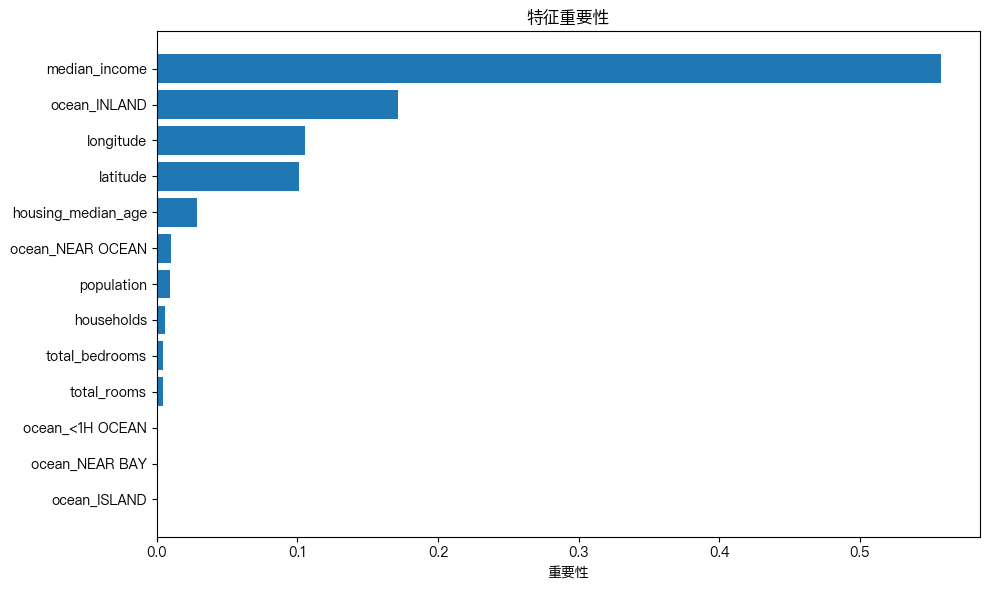

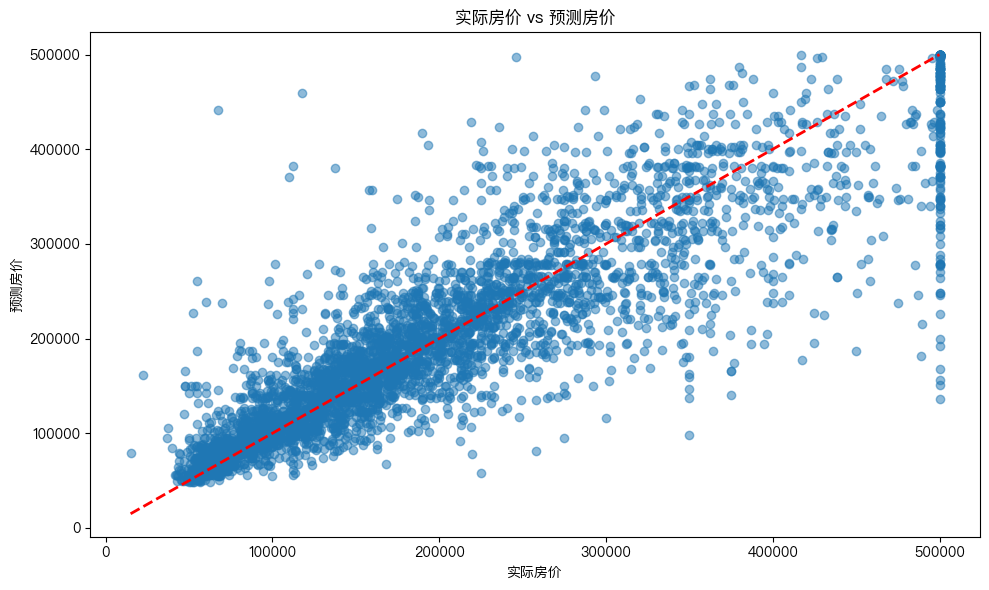

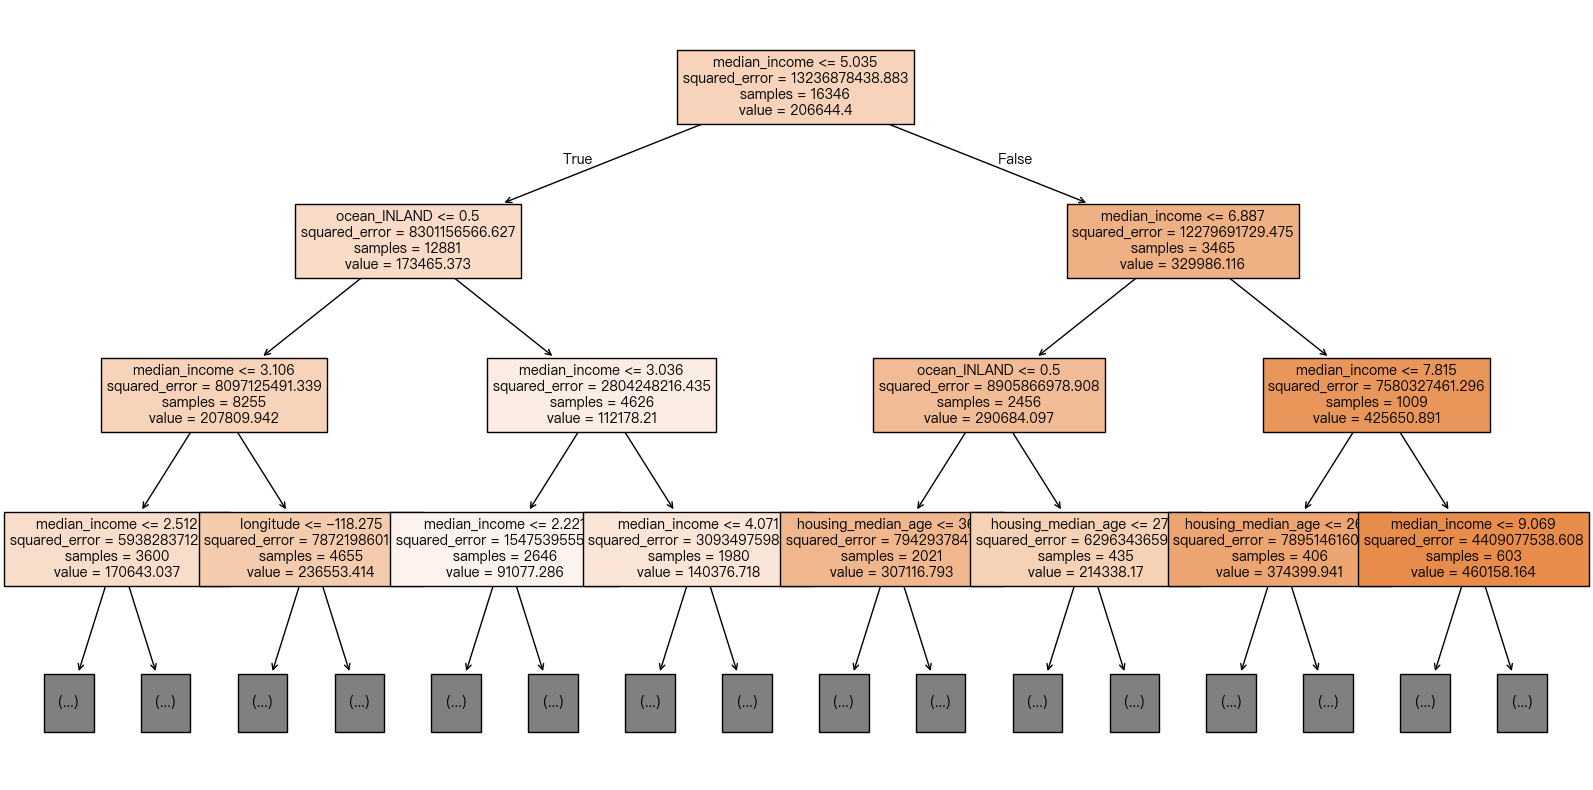

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
matplotlib.rcParams['font.sans-serif'] = "PingFang HK"


# 11. 特征重要性
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n特征重要性排名：")
print(feature_importance)

# 12. 可视化
# 特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], 
         feature_importance['importance'])
plt.xlabel('重要性')
plt.title('特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 预测值 vs 实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2)
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('实际房价 vs 预测房价')
plt.tight_layout()
plt.show()

# 13. 可视化决策树（部分）
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, 
               feature_names=X.columns, 
               max_depth=3,  # 只显示前3层
               filled=True, 
               fontsize=10)
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# 创建决策树模型
dt = DecisionTreeRegressor(random_state=42)

# 网格搜索
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 训练
grid_search.fit(X_train, y_train)

# 最佳参数
print("最佳参数：", grid_search.best_params_)

# 使用最佳模型预测
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f'\n优化后 RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_best)):,.2f}')
print(f'优化后 R² Score: {r2_score(y_test, y_pred_best):.4f}')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
最佳参数： {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}

优化后 RMSE: $57,128.43
优化后 R² Score: 0.7613


In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 参数分布
param_distributions = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'min_impurity_decrease': uniform(0, 0.1)
}

# 随机搜索
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=100,  # 尝试 100 种随机组合
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("最佳参数：", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f'\n优化后 RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_best)):,.2f}')
print(f'优化后 R² Score: {r2_score(y_test, y_pred_best):.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
最佳参数： {'max_depth': 20, 'max_features': None, 'min_impurity_decrease': np.float64(0.032434502100527396), 'min_samples_leaf': 7, 'min_samples_split': 34}

优化后 RMSE: $57,072.18
优化后 R² Score: 0.7618
